#### Linear Regression
In this **notebook** we are going to implement *Linear Regression* on a small `dataset`.

In [1]:
# Imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

We are using a small dataset from [here](https://college.cengage.com/mathematics/brase/understandable_statistics/7e/students/datasets/slr/frames/frame.html). This a data about Cricket Chirps Vs. Temperature. We will use linear regression to fit model.

In [2]:
# loading data
data = pd.read_excel('slr02.xls')

*** No CODEPAGE record, no encoding_override: will use 'ascii'


Now we look into data we see there are two columns X and Y. 

were X = chirps/sec for the striped ground cricket

and Y = temperature in degrees Fahrenheit

In [3]:
# visualise data
data

,X,Y
0,20.000000,88.599998
1,16.000000,71.599998
2,19.799999,93.300003
3,18.400000,84.300003
4,17.100000,80.599998
5,15.500000,75.199997
6,14.700000,69.699997
7,17.100000,82.000000
8,15.400000,69.400002
9,16.200001,83.300003


In [4]:
type(data)

pandas.core.frame.DataFrame

In [5]:
# data we got are in pandas dataframe format
# we need to cast it in numpy array for calulations
X = np.array(data.X)
y = np.array(data.Y)

Now we have two arrays. One containing input features and other array has output features

In [6]:
# visualise casted data
X,y

(array([20.        , 16.        , 19.79999924, 18.39999962, 17.10000038,
        15.5       , 14.69999981, 17.10000038, 15.39999962, 16.20000076,
        15.        , 17.20000076, 16.        , 17.        , 14.39999962]),
 array([88.59999847, 71.59999847, 93.30000305, 84.30000305, 80.59999847,
        75.19999695, 69.69999695, 82.        , 69.40000153, 83.30000305,
        79.59999847, 82.59999847, 80.59999847, 83.5       , 76.30000305]))

In [7]:
type(X)

numpy.ndarray

In [8]:
# function for plotting data points
def plot_points(X, y, xlabel, ylabel):
    """Plot points given X and Y co-ordinates and labels them"""
    plt.plot(X, y, 'o')
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)

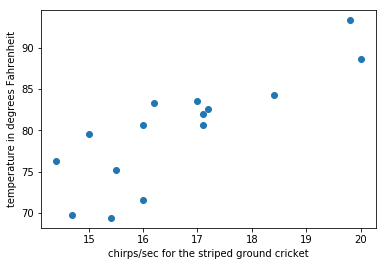

In [10]:
# plot data points
plot_points(X, y, "chirps/sec for the striped ground cricket", "temperature in degrees Fahrenheit")

We have initialised theta to a random value.
We then create hypothesis for model which is linear in nature

In [51]:
# initialised theta
np.random.seed(2)
theta = np.random.rand(2,1)
# hypothesis of model
def hypothesis(X, theta):
    """Predicts output feature given input feature and theta"""
    return theta[0] + theta[1] * X

We want to draw our line of regression to see if fit data correctly.

In [52]:
# plots line of regression
def draw_line(theta):
    """Plot a line from slope and intercept"""
    axes = plt.gca()
    x_vals = np.array(axes.get_xlim())
    y_vals = hypothesis(x_vals, theta)
    plt.plot(x_vals, y_vals, '--')

We want to plot data points and line of regession on same plot to see if we are progressing as we train our model

In [53]:
# plots points and lines
def draw_points_and_lines(X, y, xlabel, ylabel, theta):
    """Draws lines and points"""
    plot_points(X, y, xlabel, ylabel)
    draw_line(theta)

Now without training our model let's were the line of  regression lies

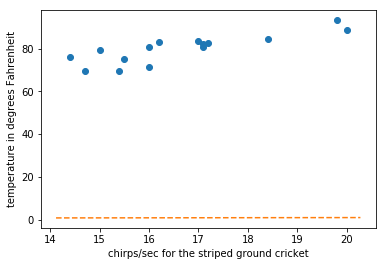

In [54]:
# draw line of regression without traing model
draw_points_and_lines(X, y, "chirps/sec for the striped ground cricket", "temperature in degrees Fahrenheit", theta)

Cost function givies us measure of how much we are error we have

we need to minimize  it. Here we have used sqared error cost function which basically sums over all the sqared error of indivisual points

In [55]:
# cost function
m = len(X)
def cost(X, y, theta):
    """Returns cost"""
    return (1/(2*m)) * np.sum((hypothesis(X, theta) - y) ** 2)

In [56]:
# initial cost without trraining model
cost(X, y, theta)

3154.8870744571304

In [57]:
(hypothesis(X, theta) - y), X

(array([-87.64547893, -70.74918386, -92.35066878, -83.38696549,
        -79.72066499, -74.36214545, -68.88288644, -81.12066652,
        -68.56474267, -82.44400317, -78.77511009, -81.71807236,
        -79.74918386, -82.62325916, -75.49067042]),
 array([20.        , 16.        , 19.79999924, 18.39999962, 17.10000038,
        15.5       , 14.69999981, 17.10000038, 15.39999962, 16.20000076,
        15.        , 17.20000076, 16.        , 17.        , 14.39999962]))

Now we will minimize cost with help of **gradient descent**

In [58]:
# minimize cost
def gradient_descent(X, y, theta, alpha, steps):
    for i in range(steps):
        old_cost = cost(X, y, theta)
        temp0 = theta[0] - alpha * ((1/m) * np.sum(hypothesis(X, theta) - y))
        temp1 = theta[1] - alpha * ((1/m) * np.dot((hypothesis(X, theta) - y), X))
        theta[0] = temp0
        theta[1] = temp1
        new_cost = cost(X, y, theta)
        if new_cost > old_cost:
            print("WARNING!!! COST INCREASING")
        else:
            print("Cost Decresing", new_cost)

In [62]:
# train model of 100 iterations
gradient_descent(X, y, theta, alpha=0.0001, steps=100)
theta

Cost Decresing 9.24630550184814
Cost Decresing 9.246299931707105
Cost Decresing 9.246294361576792
Cost Decresing 9.246288791457197
Cost Decresing 9.246283221348309
Cost Decresing 9.246277651250153
Cost Decresing 9.246272081162708
Cost Decresing 9.246266511085983
Cost Decresing 9.246260941019973
Cost Decresing 9.246255370964697
Cost Decresing 9.246249800920113
Cost Decresing 9.246244230886267
Cost Decresing 9.246238660863133
Cost Decresing 9.246233090850716
Cost Decresing 9.246227520849024
Cost Decresing 9.24622195085804
Cost Decresing 9.246216380877774
Cost Decresing 9.246210810908229
Cost Decresing 9.246205240949406
Cost Decresing 9.24619967100129
Cost Decresing 9.246194101063905
Cost Decresing 9.246188531137236
Cost Decresing 9.246182961221276
Cost Decresing 9.246177391316046
Cost Decresing 9.246171821421523
Cost Decresing 9.246166251537723
Cost Decresing 9.246160681664634
Cost Decresing 9.246155111802265
Cost Decresing 9.24614954195063
Cost Decresing 9.246143972109698
Cost Decresing

array([[0.74752333],
       [4.74721199]])

After training we can clearly see we have reduced cost and have found appropriate value of theta

In [63]:
# cost after traing model
cost(X, y, theta)

9.245754109876883

In [64]:
# value of theta after training 
theta

array([[0.74752333],
       [4.74721199]])

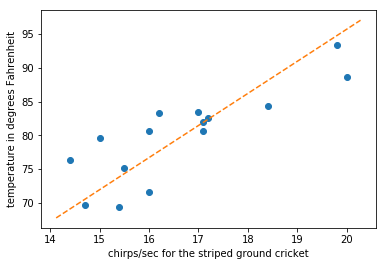

In [65]:
# regression line after traing model
draw_points_and_lines(X, y, "chirps/sec for the striped ground cricket", "temperature in degrees Fahrenheit", theta)

We can clearly see we have fitted line to the points. Thus we have successfully used linear regression to train a model.

### Prediction

In [66]:
x = np.array([19])
hypothesis(x, theta)

array([90.94455114])